In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from itertools import product

Read in data

In [2]:
data = pd.read_csv(r'../data/all_wells.csv')
data.head()

,easting,northing,porosity,permeability,Poisson's ratio,Young's Modulus,water saturation,oil saturation,proppant weight (lbs),pump rate (cubic feet/min),...,water 3,water 4,water 5,water 6,water 7,water 8,water 9,water 10,water 11,water 12
0,6300.0,53700.0,0.05,0.009,0.305,1.058935e+07,0.118212,0.881788,870417.418369,393.486280,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6401.0,53700.0,0.03,0.004,0.305,1.059206e+07,0.117850,0.882150,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6502.0,53700.0,0.05,0.008,0.305,1.059487e+07,0.117492,0.882508,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6602.0,53700.0,0.03,0.003,0.305,1.059776e+07,0.117138,0.882862,860887.258744,278.775058,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6703.0,53700.0,0.03,0.003,0.304,1.060074e+07,0.116788,0.883212,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Build testing and training datasets in such a way that NaN values can be removed while keeping the predictor and target columns in sync

In [3]:
def train_test_data(feature, test_size=0.8, random_state=0):
    total_data = data[['easting', 'northing'] + [feature]].dropna()
    x = total_data[['easting', 'northing']]
    y = total_data[feature]
    
    return train_test_split(x, y, test_size=test_size, random_state=random_state)

Method for plotting model

In [19]:
def predict_and_plot(model, precision=2000):
    valid_data = data[['easting', 'northing']].dropna()
    easting = valid_data['easting']
    northing = valid_data['northing']
    grid = np.mgrid[easting.min():easting.max():precision, northing.min():northing.max():precision]
    grid = grid.reshape((2, -1))

    input_array = []

    for i in range(len(grid[0])):
        input_array.append((grid[0][i], grid[1][i]))

    predictions = model.predict(input_array)
    print(len(predictions), grid.shape)

    plt.xlabel('easting')
    plt.ylabel('northing')
    plt.scatter(grid[0], grid[1], c=predictions)
    plt.colorbar()

Get the testing and training datasets

In [4]:
train_x, test_x, train_y, test_y = train_test_data('porosity')

Build regressor

In [32]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

kernel = C(1000.0, (1e-3, 1e3)) * RBF([1,1e5])
gp = GaussianProcessRegressor(kernel=kernel)

gp.fit(train_x, train_y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=31.6**2 * RBF(length_scale=[1, 1e+05]),
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

Plot model

2400 (2, 2400)


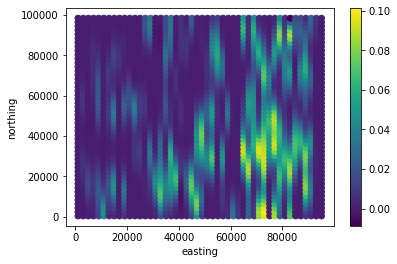

In [33]:
predict_and_plot(gp)

In [34]:
gp.score(test_x, test_y)

-1.507101207489181